In [1]:
#lets load the data
# Start EDA with pandas
import numpy as np
import pandas as pd 

# To check the data type we import 'is_string_dtype' and 'is_numeric_dtype'
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

#  To build and analyze various statistical models we use 'Statsmodels'
import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

# To perform scientific computations
from scipy.stats import shapiro
from scipy import stats

# 'Matplotlib' is a data visualization library for 2D and 3D plots
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn is used for plotting statistical graphics
import seaborn as sns

In [2]:
#loading csv data as pandas dataframe
df_property = pd.read_csv("E:\project 1\HousePrices.csv")

In [3]:
df_property # EDA started

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63.0,7711,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


In [4]:
type(df_property)

pandas.core.frame.DataFrame

In [5]:
df_property.shape

(2073, 81)

In [6]:
pd.options.display.max_rows = None # to display all tbe rows of data frame , by default max roa is set at 10 so here i change it to none.

In [7]:
df_property.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExpo

In [8]:
pd.set_option('display.max_rows', None) #here i am seting to display all the rows so as it can be done to column insted of row we type coloumn

In [9]:
df_property.dtypes # we have done the same thing but down here we have set the option of displaying all the rows

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExpo

In [10]:
# Going through the problem statement and as per the data defination  "dwel type", "overallqual", "overalcond" are categorical variable so we need to change data type to object.
# and we decide the particular data type to be categorical or continuous as per the problem statement or bussiness establishment.
# Nominal categorical varible should be in object or sting type 
# contineous or ordinal data type should be in numerical(int ) or float data type
# Caution do not judge the variable as contineous or categorical just from pandas data frame
# covert (treat) the data type of any coloumns where their is mis match


In [11]:
df_property['Dwell_Type'] = df_property.Dwell_Type.astype(object) #changing the data type from interger to object.

In [12]:
df_property['OverallQual'] = df_property['OverallQual'].astype(object) # we can change it this way also.

In [13]:
df_property['OverallCond'] = df_property.OverallCond.astype(object) #changing the data type from interger to object.

In [14]:
df_property['Dwell_Type'].dtypes

dtype('O')

In [15]:
df_property['OverallQual'].dtypes

dtype('O')

In [16]:
df_property['OverallCond'].dtypes

dtype('O')

In [17]:
df_property.dtypes

Id                       int64
Dwell_Type              object
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual             object
OverallCond             object
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExpo

In [18]:
len(df_property.dtypes)

81

In [19]:
type(df_property['Dwell_Type'][0])

int

In [20]:
#droping the id column
df_property.drop(["Id"], axis=1, inplace=True)

In [21]:
df_property.head(5)

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
df_property.shape

(2073, 80)

In [23]:
df_property.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', '

In [24]:
len(df_property.columns)

80

In [25]:
pd.set_option('display.max_columns', None) # to display all the columns 

In [26]:
df_property.describe() # here we get the information about all the numeric variable by default

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,1753.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,1960.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,72.056475,10717.853353,1969.445731,1986.617463,101.875668,437.949349,49.219489,565.101302,1052.270140,1166.096961,344.745779,6.168355,1517.011095,0.429329,0.056440,1.571635,0.378678,2.874096,1.052581,6.540280,0.602026,1980.418367,1.775687,474.683068,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,27.987475,9215.982306,30.222647,20.432694,179.169217,448.051119,165.621465,449.730940,431.026436,376.975119,438.844748,49.553967,517.236428,0.522605,0.237015,0.545963,0.499873,0.816144,0.237901,1.629673,0.633931,24.158327,0.741976,212.284955,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7620.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,208.000000,794.000000,894.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,70.000000,9492.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,466.000000,990.000000,1095.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,83.000000,11601.000000,1999.000000,2004.000000,161.500000,708.000000,0.000000,804.000000,1291.000000,1391.000000,730.000000,0.000000,1792.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2019.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [27]:
(df_property['PoolArea'] == 0). sum()

2065

In [28]:
df_property.describe(include = object) # Summary of the object variable 

,Dwell_Type,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2073,2073,2073,129,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2059,2073,2073,2073,2014,2014,2012,2014,2013,2073,2073,2073,2072,2073,2073,1085,1960,1960,1960,1960,2073,8,404,80,2073,2073
unique,18,5,2,2,4,4,2,5,3,25,9,8,5,8,10,9,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,722,1611,2063,72,1300,1854,2070,1481,1958,317,1794,2054,1719,1036,508,943,1606,2036,750,729,1233,1272,1815,928,904,1851,1349,604,1770,2025,1045,1935,1901,1043,1937,530,1252,857,1870,1885,1913,4,233,74,1797,1695


In [29]:
df_property.drop(["PoolArea" , "PoolQC"], axis=1, inplace=True)

In [30]:
df_property.shape

(2073, 78)

In [31]:
#now we all will creat the saparate varible of numeric and categorical varible in the data set .
df_numeric_property = df_property.select_dtypes(include = np.number) 

In [32]:
len(df_numeric_property.columns)

33

In [33]:
df_numeric_property.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [34]:
df_numeric_property.shape


(2073, 33)

In [35]:
df_categorical_property = df_property.select_dtypes(include = [object])

In [36]:
df_categorical_property.shape

(2073, 45)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

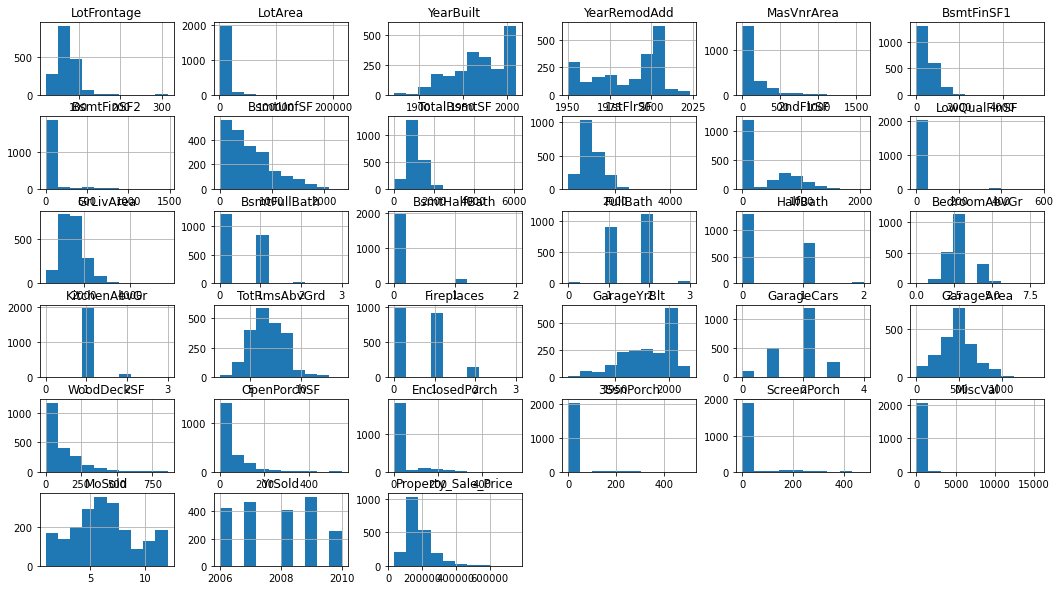

In [37]:
df_numeric_property.hist(figsize=(18,10)) # ploting histogram of all the numeric variable , here if we use the main data frame that is df_property then too the hist will pick up only the columns which have numric data type.
plt.tight_layout # to adjust the subplot anf remove te extra information

array([[<AxesSubplot:title={'center':'LotFrontage'}>]], dtype=object)

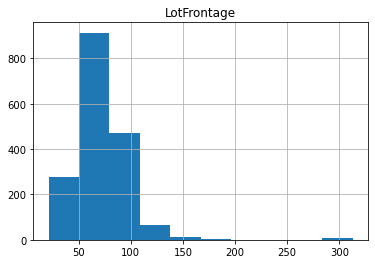

In [38]:
df_numeric_property.hist(column = ['LotFrontage']) # ploting histogram of single column

In [39]:
df_numeric_property['HalfBath'].value_counts() # geting the count of the values 

0    1303
1     755
2      15
Name: HalfBath, dtype: int64

In [40]:
df_numeric_property['HalfBath'].unique() # geting the unique values

array([1, 0, 2], dtype=int64)

In [41]:
df_numeric_property['MiscVal'].unique()

array([    0,   700,   350,   500,   400,   480,   450, 15500,  1200,
         800,  2000,   600,  3500,  1300,    54,   620,   560,  1400,
        8300,  1150,  2500], dtype=int64)

In [42]:
df_numeric_property['MiscVal'].value_counts()

0        1996
400        21
500        11
450         6
700         6
2000        5
600         4
2500        3
1200        3
620         3
480         3
560         2
1300        2
54          1
800         1
1150        1
1400        1
350         1
8300        1
15500       1
3500        1
Name: MiscVal, dtype: int64

<AxesSubplot:>

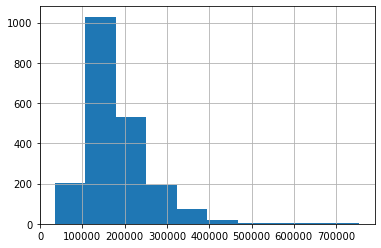

In [43]:
df_numeric_property['Property_Sale_Price'].hist() # same plot as above ploting histogram of property sale price frequency distrubation

In [44]:
df_categorical_property.columns

Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [2]:
fig, ax = plt.subplots(nrows=9, ncols=5, figsize = (65, 50))

# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(df_categorical_property , ax.flatten()):
    sns.countplot(df_categorical_property[variable], ax = subplot)
    
# display the plot
plt.show()

NameError: name 'plt' is not defined

In [46]:
type(fig) # Experiment

matplotlib.figure.Figure

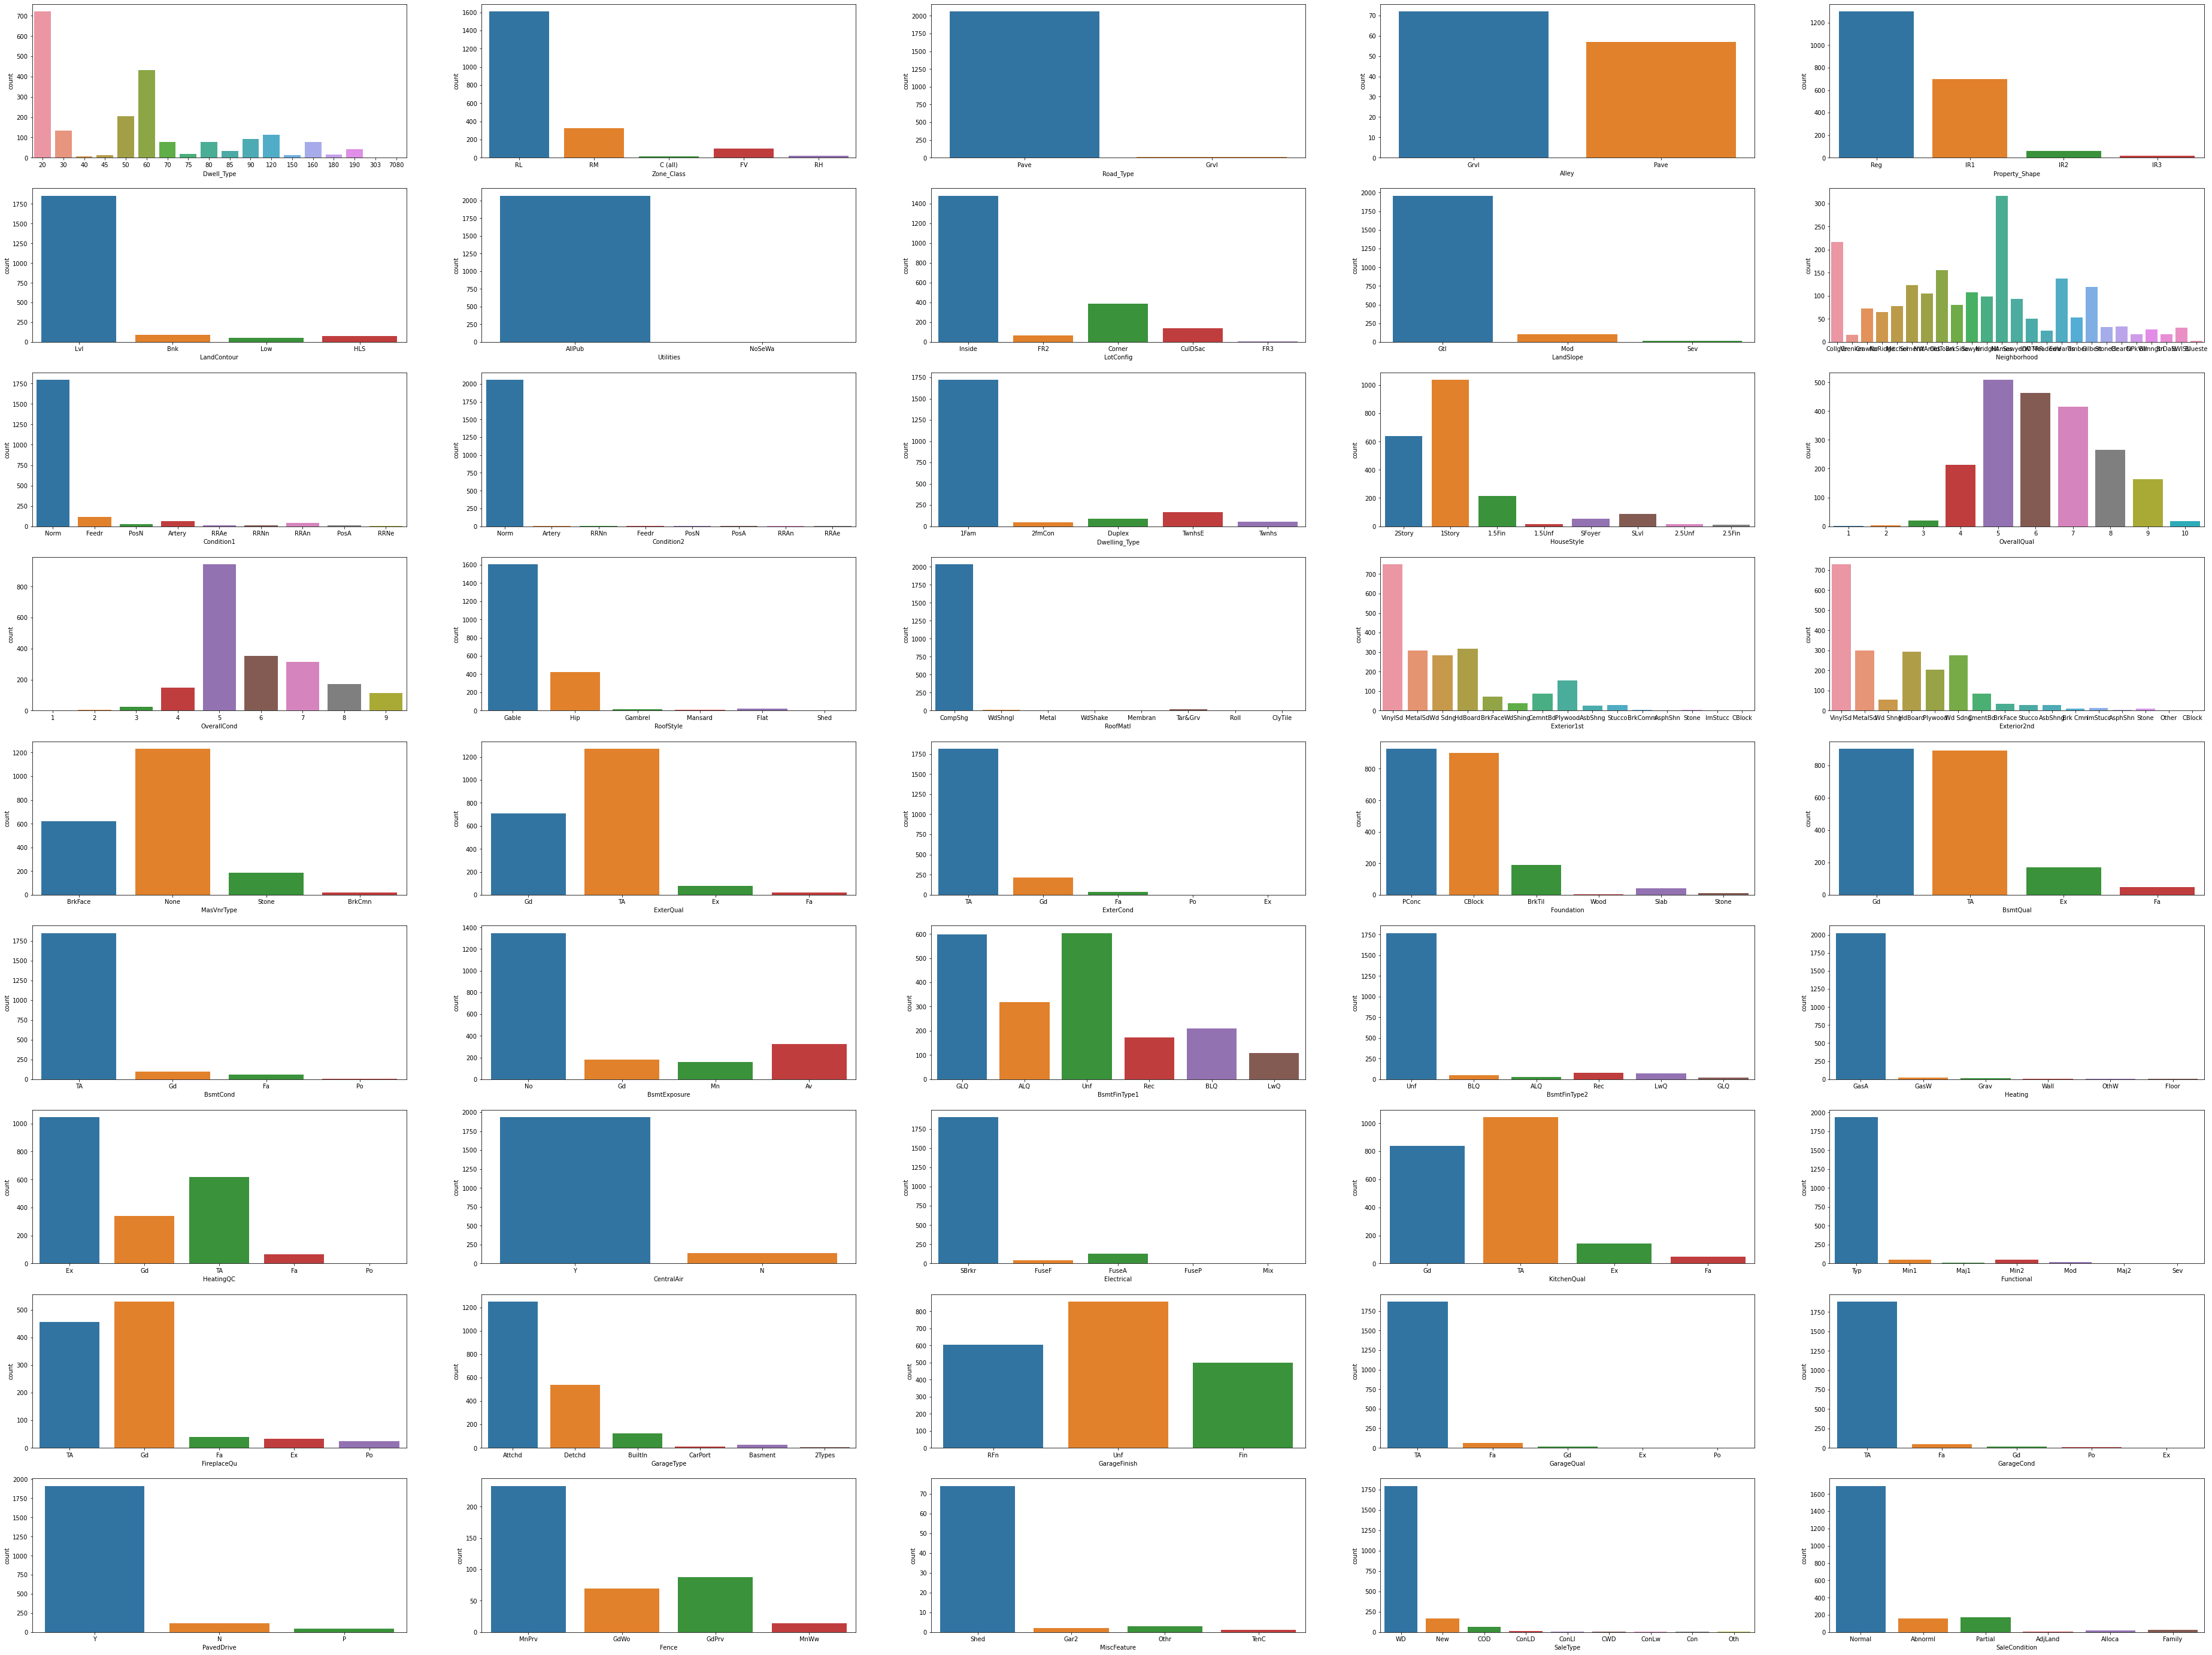

In [47]:
fig # Experiment


In [48]:
df_property["OverallQual"].unique()

array([7, 6, 8, 5, 9, 4, 10, 3, 1, 2], dtype=object)

<AxesSubplot:xlabel='OverallQual', ylabel='Property_Sale_Price'>

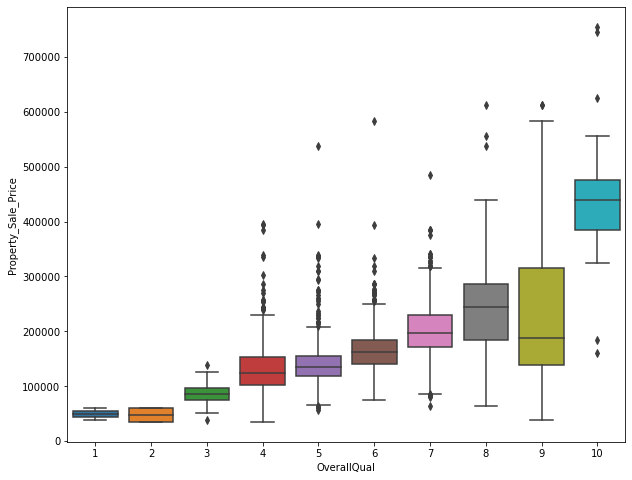

In [49]:
plt.figure(figsize=(10,8))
sns.boxplot(x = "OverallQual" , y ="Property_Sale_Price", data = df_property) # Ploting the box plot using sns.


<AxesSubplot:xlabel='OverallCond', ylabel='Property_Sale_Price'>

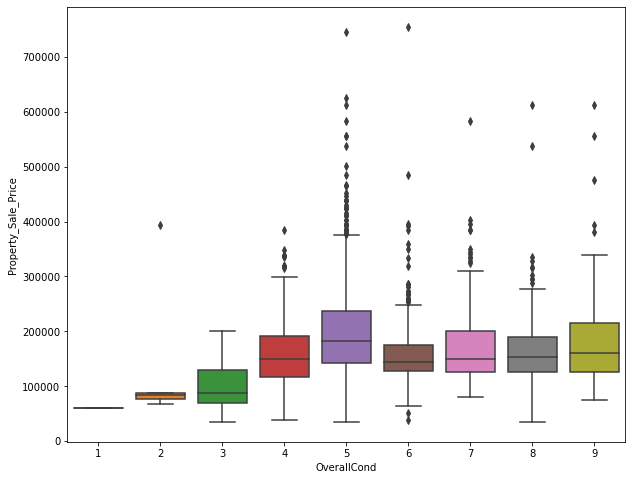

In [50]:
plt.figure(figsize=(10,8))
sns.boxplot(y="Property_Sale_Price", x="OverallCond", data= df_property)

In [51]:
# draw the pairplot such that the diagonal should be density plot and the other graphs should be scatter plot

#sns.pairplot(df_numeric_property)

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Sale_Price'>

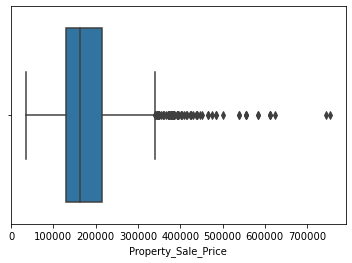

In [52]:
# Here we are ploting box plot to discover the outliers using all the feature one by one
sns.boxplot(df_numeric_property["Property_Sale_Price"])

In [53]:
df_numeric_property = df_numeric_property[df_numeric_property['Property_Sale_Price'] < 500000 ] # here we are removing the outlier

In [54]:
df_numeric_property.shape

(2059, 33)

In [55]:
#check the missing value of entire data set
totall_null = df_property.isnull().sum()

In [56]:
totall_null.sort_values()

Dwell_Type                0
TotalBsmtSF               0
SaleCondition             0
HeatingQC                 0
CentralAir                0
1stFlrSF                  0
2ndFlrSF                  0
LowQualFinSF              0
GrLivArea                 0
BsmtFullBath              0
BsmtHalfBath              0
FullBath                  0
HalfBath                  0
BedroomAbvGr              0
KitchenAbvGr              0
BsmtUnfSF                 0
KitchenQual               0
Functional                0
Fireplaces                0
GarageCars                0
GarageArea                0
PavedDrive                0
WoodDeckSF                0
OpenPorchSF               0
EnclosedPorch             0
3SsnPorch                 0
ScreenPorch               0
MiscVal                   0
MoSold                    0
YrSold                    0
SaleType                  0
TotRmsAbvGrd              0
BsmtFinSF2                0
Heating                   0
Condition2                0
Zone_Class          

In [57]:
totall_count= df_property.isnull().count()

In [58]:
totall_count

Dwell_Type             2073
Zone_Class             2073
LotFrontage            2073
LotArea                2073
Road_Type              2073
Alley                  2073
Property_Shape         2073
LandContour            2073
Utilities              2073
LotConfig              2073
LandSlope              2073
Neighborhood           2073
Condition1             2073
Condition2             2073
Dwelling_Type          2073
HouseStyle             2073
OverallQual            2073
OverallCond            2073
YearBuilt              2073
YearRemodAdd           2073
RoofStyle              2073
RoofMatl               2073
Exterior1st            2073
Exterior2nd            2073
MasVnrType             2073
MasVnrArea             2073
ExterQual              2073
ExterCond              2073
Foundation             2073
BsmtQual               2073
BsmtCond               2073
BsmtExposure           2073
BsmtFinType1           2073
BsmtFinSF1             2073
BsmtFinType2           2073
BsmtFinSF2          

In [59]:
percentage = (totall_null *100 / totall_count)


In [60]:
percentage.sort_values()

Dwell_Type              0.000000
TotalBsmtSF             0.000000
SaleCondition           0.000000
HeatingQC               0.000000
CentralAir              0.000000
1stFlrSF                0.000000
2ndFlrSF                0.000000
LowQualFinSF            0.000000
GrLivArea               0.000000
BsmtFullBath            0.000000
BsmtHalfBath            0.000000
FullBath                0.000000
HalfBath                0.000000
BedroomAbvGr            0.000000
KitchenAbvGr            0.000000
BsmtUnfSF               0.000000
KitchenQual             0.000000
Functional              0.000000
Fireplaces              0.000000
GarageCars              0.000000
GarageArea              0.000000
PavedDrive              0.000000
WoodDeckSF              0.000000
OpenPorchSF             0.000000
EnclosedPorch           0.000000
3SsnPorch               0.000000
ScreenPorch             0.000000
MiscVal                 0.000000
MoSold                  0.000000
YrSold                  0.000000
SaleType  

In [61]:
# missing value of the numerical data set
df_numeric_property.isnull().sum()

LotFrontage            320
LotArea                  0
YearBuilt                0
YearRemodAdd             0
MasVnrArea              14
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt            113
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
MiscVal                  0
MoSold                   0
YrSold                   0
Property_Sale_Price      0
dtype: int64

In [62]:
df_numeric_property[df_numeric_property.columns[df_numeric_property.isnull().any()]].isnull().sum() # to find out the sum of all the null values in numeric dataframe and display only those columns which have null value 

LotFrontage    320
MasVnrArea      14
GarageYrBlt    113
dtype: int64

In [63]:
# now we have to fill the missing value for the numerical features
#lotfrontage is rightly skewed so we are filling the missing value with median
df_numeric_property['LotFrontage'] = df_numeric_property['LotFrontage'].fillna(df_numeric_property['LotFrontage'].median())

#garage yr built with zero and masvnr area with median 
df_numeric_property['GarageYrBlt'] = df_numeric_property['GarageYrBlt'].fillna(0)
df_numeric_property['MasVnrArea'] = df_numeric_property['MasVnrArea'].fillna(df_numeric_property['MasVnrArea'].median())

In [64]:
# retrivibg the total no of misssing value of the categorical features
df_categorical_property[df_categorical_property.columns[df_categorical_property.isnull().any()]].isnull().sum()

Alley           1944
MasVnrType        14
BsmtQual          59
BsmtCond          59
BsmtExposure      61
BsmtFinType1      59
BsmtFinType2      60
Electrical         1
FireplaceQu      988
GarageType       113
GarageFinish     113
GarageQual       113
GarageCond       113
Fence           1669
MiscFeature     1993
dtype: int64

In [65]:
# we have to fill the missing value of categorical features
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# replace NA values in 'MiscFeature' with a valid value, 'None'
df_categorical_property['MiscFeature'] = df_categorical_property['MiscFeature'].fillna('None')

# replace NA values in 'Alley' with a valid value, 'No alley access' 
df_categorical_property['Alley'] = df_categorical_property['Alley'].fillna('No alley access')

# replace NA values in 'Fence' with a valid value, 'No Fence'
df_categorical_property['Fence'] = df_categorical_property['Fence'].fillna('No Fence')

# replace null values in 'FireplaceQu' with a valid value, 'No Fireplace' 
df_categorical_property['FireplaceQu'] = df_categorical_property['FireplaceQu'].fillna('No Fireplace')



<ipython-input-65-84e8889be1a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical_property['MiscFeature'] = df_categorical_property['MiscFeature'].fillna('None')
<ipython-input-65-84e8889be1a5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical_property['Alley'] = df_categorical_property['Alley'].fillna('No alley access')
<ipython-input-65-84e8889be1a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [66]:
# replace the missing values in the categoric variables representing the garage by `No Garage`
for col in ['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']:
    df_categorical_property[col].fillna('No Garage', inplace = True)

C:\Users\ABC\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [67]:
# according to the data definition, 'NA' denotes the absence of basement in the variabels 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2'
# replace the missing values in the categoric variables representing the basement by `No Basement`
for col in ['BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond','BsmtFinType1']:
    df_categorical_property[col].fillna('No Basement', inplace = True)

In [68]:
# according to the data definition, 'NA' denotes the absence of masonry veneer
# replace the missing values in the categorical variable 'MasVnrType' with a value, 'None'
df_categorical_property['MasVnrType'] = df_categorical_property['MasVnrType'].fillna('None')

<ipython-input-68-5cce4d2d845b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical_property['MasVnrType'] = df_categorical_property['MasVnrType'].fillna('None')


In [69]:
# replace the missing values in the categorical variable 'Electrical' with its mode
mode_electrical = df_categorical_property['Electrical'].mode()
df_categorical_property['Electrical'].fillna(mode_electrical[0] , inplace = True)

In [70]:
f1_property = pd.concat([df_numeric_property, df_categorical_property], axis=1, join='inner')

In [71]:
f1_property.head(5)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,Dwell_Type,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2,2008,208500,60,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Fence,None,WD,Normal
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,5,2007,181500,20,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,None,WD,Normal
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,9,2008,223500,60,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,None,WD,Normal
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,2,2006,140000,70,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No Fence,None,WD,Abnorml
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,12,2008,250000,60,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,None,WD,Normal


In [72]:
# now generating the coorelation matrix of the numerical varible we can use the main data frame to as the coorelation will be provided only for the numerical variable.
corrmat = f1_property.corr()                    # or we can write this as corrmat = df_numeric_property.corr() it will give the same result.

# print the correlation matrix
corrmat

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price
LotFrontage,1.000000,0.238191,0.081517,0.092211,0.111412,0.118122,0.055937,0.105129,0.256237,0.318458,0.054620,0.024525,0.284689,0.078472,-0.036578,0.153532,0.036507,0.207026,0.009171,0.264457,0.193244,0.081887,0.216162,0.248652,0.073232,0.092217,0.000492,0.037425,0.018689,-0.003469,0.028949,0.024222,0.259284
LotArea,0.238191,1.000000,-0.017109,0.013312,0.041665,0.157255,0.077684,-0.000161,0.193753,0.239459,0.023070,-0.000437,0.196624,0.123539,0.031117,0.085524,-0.002532,0.103089,-0.007048,0.143813,0.208337,0.064729,0.120713,0.137110,0.112262,0.063370,-0.021205,0.011367,0.027271,0.031767,0.000059,-0.008380,0.201837
YearBuilt,0.081517,-0.017109,1.000000,0.534846,0.258605,0.200397,-0.027750,0.117984,0.322489,0.225896,0.011759,-0.180594,0.158950,0.139671,-0.018345,0.398912,0.191748,-0.057029,-0.143052,0.069192,0.127941,0.219338,0.453642,0.404166,0.182813,0.178019,-0.321816,0.034844,-0.050894,-0.038275,0.031601,-0.007701,0.456523
YearRemodAdd,0.092211,0.013312,0.534846,1.000000,0.153766,0.092169,-0.074160,0.197311,0.275945,0.214706,0.133300,-0.084622,0.265337,0.099852,-0.011554,0.419381,0.176598,-0.038715,-0.127357,0.161845,0.099378,0.111173,0.387912,0.329864,0.182945,0.218917,-0.176180,0.040749,-0.044323,-0.011217,0.038320,0.055504,0.497005
MasVnrArea,0.111412,0.041665,0.258605,0.153766,1.000000,0.203449,-0.077174,0.128413,0.317306,0.289921,0.175364,-0.071076,0.358569,0.065543,0.020719,0.257621,0.192465,0.103158,-0.052282,0.244016,0.263473,0.131745,0.340641,0.342405,0.113509,0.136036,-0.094168,0.033596,0.054797,-0.034648,-0.006236,0.011242,0.438844
BsmtFinSF1,0.118122,0.157255,0.200397,0.092169,0.203449,1.000000,-0.063139,-0.514643,0.468375,0.377574,-0.144388,-0.071639,0.146652,0.641491,0.080676,0.022725,0.003940,-0.129599,-0.089633,-0.022325,0.202566,0.093347,0.179226,0.244935,0.208102,0.108858,-0.086769,0.047758,0.042606,-0.000288,-0.011921,0.019093,0.342365
BsmtFinSF2,0.055937,0.077684,-0.027750,-0.074160,-0.077174,-0.063139,1.000000,-0.207872,0.106746,0.095781,-0.115530,-0.003752,-0.029608,0.170270,0.068032,-0.093610,-0.044307,-0.017684,-0.043336,-0.048209,0.039138,0.046382,-0.042634,-0.019151,0.076978,-0.001180,0.058115,-0.030464,0.098692,-0.002251,-0.016672,0.025224,-0.028908
BsmtUnfSF,0.105129,-0.000161,0.117984,0.197311,0.128413,-0.514643,-0.207872,1.000000,0.444357,0.329430,-0.002545,0.032617,0.244148,-0.412720,-0.111400,0.291071,-0.046310,0.154499,0.014057,0.247856,0.077578,0.045420,0.225198,0.197519,-0.005751,0.141691,-0.010603,0.009747,-0.013646,-0.019743,0.044928,-0.048135,0.243283
TotalBsmtSF,0.256237,0.193753,0.322489,0.275945,0.317306,0.468375,0.106746,0.444357,1.000000,0.779426,-0.198123,-0.041315,0.399745,0.295662,-0.007614,0.295603,-0.062438,0.022277,-0.095253,0.220785,0.308159,0.163401,0.408374,0.456518,0.240381,0.262956,-0.078579,0.047997,0.068569,-0.022127,0.028723,-0.021312,0.602471
1stFlrSF,0.318458,0.239459,0.225896,0.214706,0.289921,0.377574,0.095781,0.329430,0.779426,1.000000,-0.240017,-0.020983,0.528308,0.222190,-0.010812,0.354512,-0.153219,0.113136,0.068935,0.372284,0.381998,0.163309,0.419084,0.462783,0.240294,0.216539,-0.049631,0.064372,0.074862,-0.027565,0.048724,-0.003292,0.581605


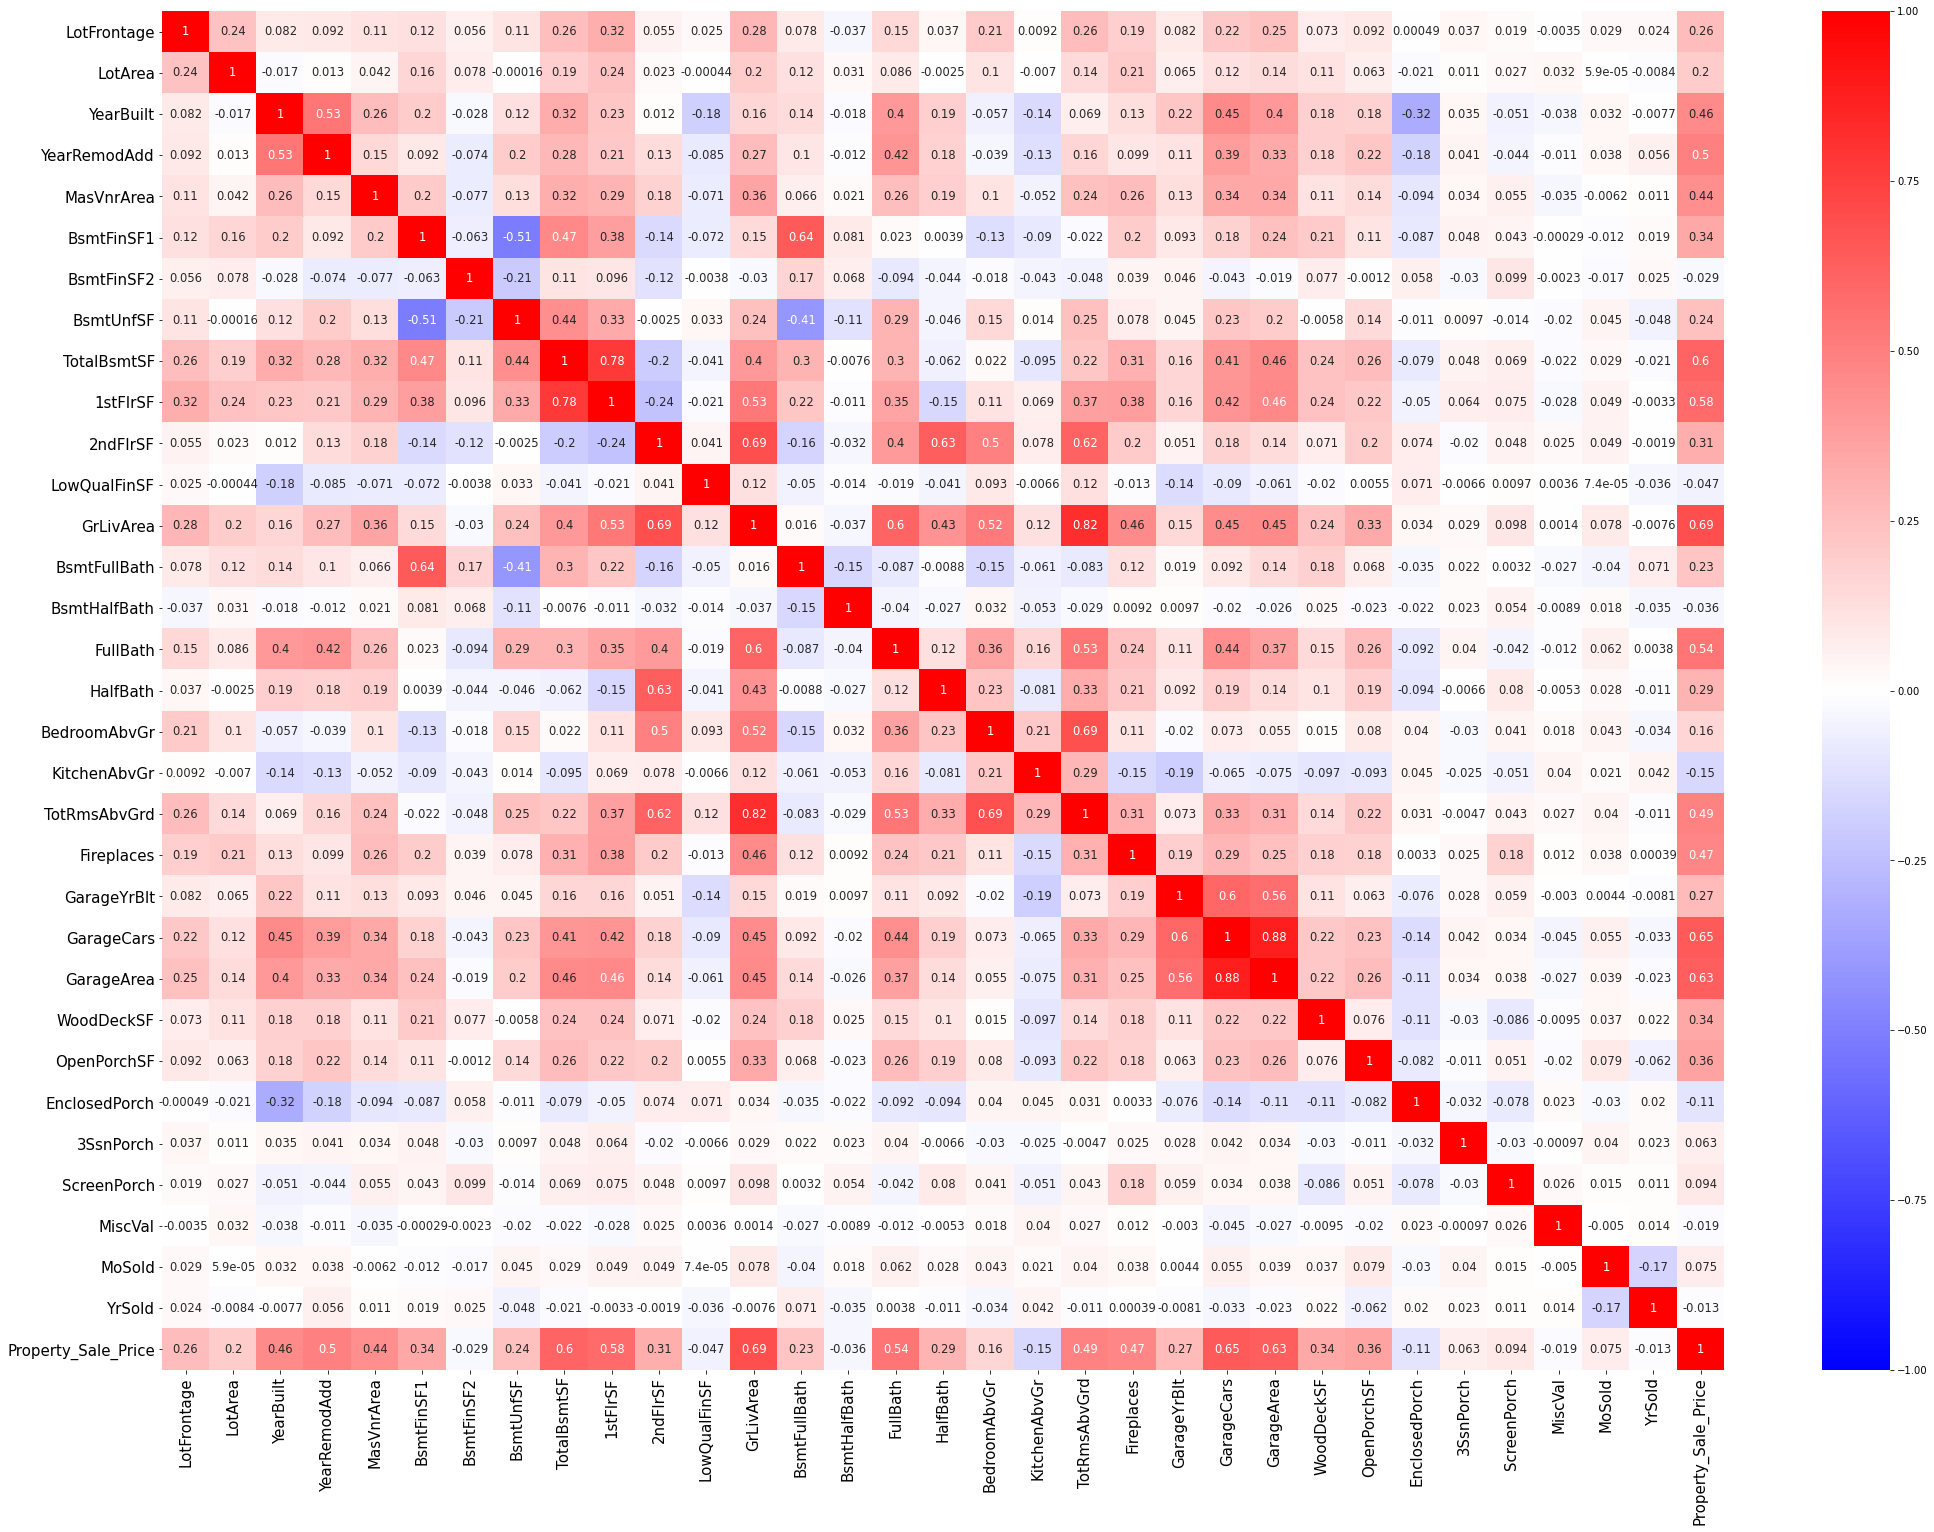

In [73]:
# ploting the heat map to visualise better the corelation matrix
# set the plot size
plt.figure(figsize = (35,25))

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# annot_kws: sets the font size of the annotation
# annot: prints the correlation values in the chart
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
sns.heatmap(corrmat, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'bwr', annot_kws = {"size": 11.5})

# set the size of x and y axes labels using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

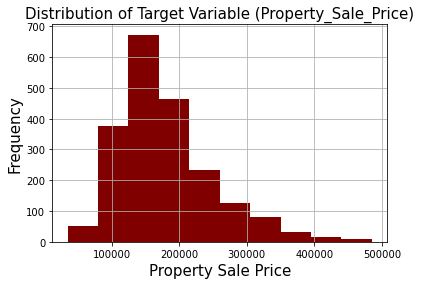

In [74]:
# check the distribution of target variable
df_numeric_property.Property_Sale_Price.hist(color = 'maroon')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)
plt.xlabel('Property Sale Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [75]:
# as by visiual representation we see that the target variable is right skewed
#so we perform the statistical test 
#Let us perform from Shapiro-Wilk test to check the normality of the target variable.

#The null and alternate hypothesis of Shapiro-Wilk test is as follows:
# if alpha (0.05) , if the p value is less than alpha then data is not normally distributed

#Ho: The data is normally distributed

#H1: The data is not normally distributed


In [76]:
# shapiro() returns the the test statistics along with the p-value of the test
stat, p = shapiro(df_numeric_property.Property_Sale_Price)

# print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# set the level of significance (alpha) to 0.05
alpha = 0.05

# if the p-value is less than alpha print we reject alpha
# if the p-value is greater than alpha print we accept alpha 
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.926, p-value=0.000
The data is not normally distributed (reject H0)


In [77]:
#We can see that the p-value is less than 0.05 and thus we reject the null hypothesis. It can be concluded that the data is not normally distributed.

#We need to log transform the variable 'Property_Sale_Price' in order to reduce the skewness.

#If the data is not normally distributed, use log transformation to reduce the skewness and get a near normally distributed data

#The log transformation can be used to reduce the skewbess. To log transform the 'Property_Sale_Price' variable we use the function np.log().


In [78]:
# log transformation using np.log() but it does not gaurantee the normality just pushes data towards normality
df_numeric_property['log_Property_Sale_Price'] = np.log(df_numeric_property['Property_Sale_Price'])

# display the top 5 rows of the data
df_numeric_property.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2,2008,208500,12.247694
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,5,2007,181500,12.109011
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,9,2008,223500,12.317167
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,2,2006,140000,11.849398
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,12,2008,250000,12.429216


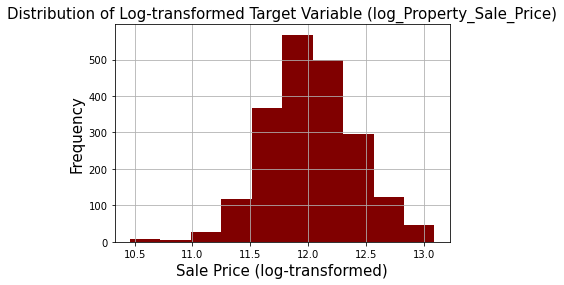

In [79]:
#Recheck for normality by plotting histogram and performing Shapiro-Wilk test

#Let us first plot a histogram of log_Property_Sale_Price.

# recheck for normality 
# plot the histogram using hist
df_numeric_property.log_Property_Sale_Price.hist(color = 'maroon')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Log-transformed Target Variable (log_Property_Sale_Price)', fontsize = 15)
plt.xlabel('Sale Price (log-transformed)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()


In [80]:
#Let us perform Shapiro-Wilk test.

# shapiro() returns the the test statistics along with the p-value of the test
stat, p = shapiro(df_numeric_property['log_Property_Sale_Price'])

# print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# set the level of significance (alpha) to 0.05
alpha = 0.05

# if the p-value is less than alpha print we reject alpha
# if the p-value is greater than alpha print we accept alpha 
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.991, p-value=0.000
The data is not normally distributed (reject H0)


In [81]:
# find the skewness of the variable log_Property_Sale_Price
df_numeric_property['log_Property_Sale_Price'].skew()

-0.10293032838737998

In [82]:
#It can be visually seen that the data has near-normal distribution, but Shapiro-Wilk test does not support the claim.
#Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs.

In [83]:
# we have to encode the categorical feature into dummy varibles so that it can be used in mathmatical model
# to create the dummy variables  we use 'get_dummies()' from pandas 
# to create (n-1) dummy variables we use 'drop_first = True' 
dummy_encoded_variables = pd.get_dummies(df_categorical_property, drop_first = True)

In [84]:
dummy_encoded_variables.head()

,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,M

In [85]:
f2_property_dummy = pd.concat([df_numeric_property, dummy_encoded_variables], axis=1, join='inner')

In [86]:
f2_property_dummy.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,Garage

In [87]:
f2_property_dummy.shape

(2059, 288)

In [88]:
df_numeric_property.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price', 'log_Property_Sale_Price'],
      dtype='object')

In [89]:
df_categorical_property.columns

Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [90]:
# here we have to introduce w0 (intercept) into the data frame 
f2_property_dummy = sm.add_constant(f2_property_dummy)

In [91]:
f2_property_dummy.shape

(2059, 289)

In [92]:
# separate the independent and dependent variables
# drop(): drops the specified columns
X = f2_property_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)

# extract the target variable from the data set
y = f2_property_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

In [93]:
# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed as it makes program reproducable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 287)
The shape of X_test is: (618, 287)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


In [94]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_logmodel_full = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit() # this is our model linreg_logmodel_full is an object returned by the fit method ot it is object of OLS class.

# print the summary output
print(linreg_logmodel_full.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.942
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     71.93
Date:                     Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                             20:30:22   Log-Likelihood:                 1377.6
No. Observations:                     1441   AIC:                            -2221.
Df Residuals:                         1174   BIC:                            -813.4
Df Model:                              266                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [95]:
# now after bulding the model we now need to predict the house price by providing all the values of the features .
# 1st let provide the test data as the features.
# for predicting the house price we have perdefined class is all the library.

In [96]:
# 1st lets check the shape of the test data.
X_test.shape


(618, 287)

In [97]:
y_test.shape

(618, 2)

In [98]:
#This model explains around 94% of the variation in dependent variable log_Property_Sale_Price. The Condition Number 1.05e+19 suggests that there is severe multicollinearity in the data. The Durbin-Watson test statistics is 1.885 i.e. close to 2.0 and thus it indicates that there is no autocorrelation. 
#Condition Number : Multicollinearity can be checkked by computing the condition number(CN). If condition number is between 100 and 1000, there is moderate multicollinearity, if condition number is less than 100, there is no multicollinearity and if condition number is greater 1000 there is severe multicollinearity in the data. 
#Durbin-Watson : The Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation.

In [99]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_logmodel_full_predictions = linreg_logmodel_full.predict(X_test)

In [100]:
linreg_logmodel_full_predictions.shape

(618,)

In [101]:
# Note that the predicted values are log transformed Property_Sale_Price. In order to get Property_Sale_Price values, we take the antilog of these predicted values by using the function np.exp()
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_logmodel_full_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

In [102]:
# Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [103]:
# calculate rmse using rmse()
linreg_logmodel_full_rmse = mean_squared_error(actual_Property_Sale_Price, predicted_Property_Sale_Price, squared=False)

# calculate R-squared using rsquared
linreg_logmodel_full_rsquared = linreg_logmodel_full.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_logmodel_full_rsquared_adj = linreg_logmodel_full.rsquared_adj 

In [104]:
linreg_logmodel_full_rmse

26703.095145146155

In [105]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_logmodel_full_metrics = pd.Series({'Model': "Linreg full model with log of target variable ",
                     'RMSE':linreg_logmodel_full_rmse,
                     'R-Squared': linreg_logmodel_full_rsquared,
                     'Adj. R-Squared': linreg_logmodel_full_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_logmodel_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,26703.095145,0.942188,0.929089


In [106]:
#  We will also build a linear regression model without performing log transformation on the target variable.


In [107]:
# build a OLS model using function OLS()
# Property_Sale_Price is our target variable
# use fit() to fit the model on train data
linreg_nolog_model = sm.OLS(y_train['Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_nolog_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.942
Model:                             OLS   Adj. R-squared:                  0.929
Method:                  Least Squares   F-statistic:                     72.15
Date:                 Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                         20:30:24   Log-Likelihood:                -16075.
No. Observations:                 1441   AIC:                         3.268e+04
Df Residuals:                     1174   BIC:                         3.409e+04
Df Model:                          266                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [108]:
# Predict the values using test set
linreg_nolog_model_predictions = linreg_nolog_model.predict(X_test)

In [109]:
# calculate rmse using rmse()
linreg_nolog_model_rmse = mean_squared_error(actual_Property_Sale_Price, linreg_nolog_model_predictions, squared=False)

# calculate R-squared using rsquared
linreg_nolog_model_rsquared = linreg_nolog_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_nolog_model_rsquared_adj = linreg_nolog_model.rsquared_adj 

In [110]:
# append the result table 
# compile the required information
linreg_nolog_model_metrics = pd.Series({'Model': "Linreg full model without log of target variable ",
                                                 'RMSE':linreg_nolog_model_rmse,
                                                 'R-Squared': linreg_nolog_model_rsquared,
                                                 'Adj. R-Squared': linreg_nolog_model_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_nolog_model_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,26703.095145,0.942188,0.929089
1,Linreg full model without log of target variable,36250.935031,0.942355,0.929294


In [111]:
# Feature Engineering
#It is the process of creating new features using domain knowledge of the data that provides more insight into the data. Let us create a few features from the existing dataset and build a regression model on the newly created data.
# Multiple Linear Regression (Using New Feature) - 1
#In order to build the model, we do the following:
#1. Create a new feature by using variables 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', and 'GrLivArea'.

#Calculate the complete area of the house.
#Create a new variable TotalSF representing the total square feet area of the house by adding the area of the first floor, second floor, ground level and basement of the house.


In [112]:
# create a new variable 'TotalSF' using the variables 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', and 'GrLivArea'
df_numeric_property['TotalSF'] = df_numeric_property['TotalBsmtSF'] + df_numeric_property['1stFlrSF'] + df_numeric_property['2ndFlrSF'] + df_numeric_property['GrLivArea']

# as we have created a new variable using the variables 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' and 'GrLivArea', we will remove them
# use 'drop()' to remove the variables
df_numeric_property = df_numeric_property.drop(["TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea"], axis=1)

In [113]:
df_numeric_property.isnull().any()

LotFrontage                False
LotArea                    False
YearBuilt                  False
YearRemodAdd               False
MasVnrArea                 False
BsmtFinSF1                 False
BsmtFinSF2                 False
BsmtUnfSF                  False
LowQualFinSF               False
BsmtFullBath               False
BsmtHalfBath               False
FullBath                   False
HalfBath                   False
BedroomAbvGr               False
KitchenAbvGr               False
TotRmsAbvGrd               False
Fireplaces                 False
GarageYrBlt                False
GarageCars                 False
GarageArea                 False
WoodDeckSF                 False
OpenPorchSF                False
EnclosedPorch              False
3SsnPorch                  False
ScreenPorch                False
MiscVal                    False
MoSold                     False
YrSold                     False
Property_Sale_Price        False
log_Property_Sale_Price    False
TotalSF   

In [114]:
# concatenate the numerical and dummy encoded categorical variables column-wise
f3_property_dummy = pd.concat([df_numeric_property, dummy_encoded_variables], axis=1 ,join='inner')

# display data with dummy variables
f3_property_dummy.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,TotalSF,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,

In [115]:
# add the intercept column using 'add_constant()'
f3_property_dummy = sm.add_constant(f3_property_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = f3_property_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)

# extract the target variable from the data set
y = f3_property_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train data and test data 
# what proportion of data should be included in test data is specified using 'test_size'
# set 'random_state' to get the same data each time the code is executed 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 284)
The shape of X_test is: (618, 284)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


In [116]:
# build a full model using OLS()
# consider the target variable 'log_Property_Sale_Price'
# use fit() to fit the model on train data
linreg_feature_1_model = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_feature_1_model.summary())    

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.942
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     72.26
Date:                     Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                             20:30:25   Log-Likelihood:                 1377.6
No. Observations:                     1441   AIC:                            -2223.
Df Residuals:                         1175   BIC:                            -820.6
Df Model:                              265                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [117]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_feature_1_model_predictions = linreg_feature_1_model.predict(X_test)

In [118]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_feature_1_model_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

In [119]:
# Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.
# calculate rmse using rmse()
linreg_feature_1_model_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_feature_1_model_rsquared = linreg_feature_1_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_feature_1_model_rsquared_adj = linreg_feature_1_model.rsquared_adj 

In [120]:
# append the accuracy scores to the table
# compile the required information
linreg_feature_1_model_metrics = pd.Series({'Model': "Linreg with new feature (TotalSF) ",
                                                'RMSE': linreg_feature_1_model_rmse,
                                                'R-Squared': linreg_feature_1_model_rsquared,
                                                'Adj. R-Squared': linreg_feature_1_model_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_feature_1_model_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,26703.095145,0.942188,0.929089
1,Linreg full model without log of target variable,36250.935031,0.942355,0.929294
2,Linreg with new feature (TotalSF),26707.706758,0.942187,0.929148


In [121]:
# Multiple Linear Regression (Using New Feature) - 2
# 1. Create two new feature by using variables 'Buiding_age' and 'Remodel_age'

In [122]:
# 'datetime' is used to perform operations related to date and time
import datetime as dt

# 'now().year' returns the current year
current_year = int(dt.datetime.now().year)

In [123]:
current_year

2021

In [124]:
# create 2 new variables 'Buiding_age' and 'Remoel_age' 
Buiding_age = current_year - df_numeric_property.YearBuilt
Remodel_age = current_year - df_numeric_property.YearRemodAdd

In [125]:
# append the newly created variables to the dataframe
df_numeric_property['Buiding_age'] = Buiding_age
df_numeric_property['Remodel_age'] = Remodel_age

# as we have added a new variable using the variables 'YearBuilt' and 'YearRemodAdd', we will drop them
# drop the variables using drop()
df_numeric_property = df_numeric_property.drop(['YearBuilt', 'YearRemodAdd'], axis=1)

In [126]:
df_numeric_property.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price', 'log_Property_Sale_Price',
       'TotalSF', 'Buiding_age', 'Remodel_age'],
      dtype='object')

In [127]:
# concatenate the numerical and dummy encoded categorical variables column-wise
f4_property_dummy = pd.concat([df_numeric_property, dummy_encoded_variables], axis=1 ,join='inner')

# display data with dummy variables
f4_property_dummy.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,TotalSF,Buiding_age,Remodel_age,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort

In [128]:
# add the intercept column using 'add_constant()'
f4_property_dummy = sm.add_constant(f4_property_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = f4_property_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)

# extract the target variable from the data set
y = f4_property_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train data and test data 
# what proportion of data should be included in test data is specified using 'test_size'
# set 'random_state' to get the same data each time the code is executed  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 284)
The shape of X_test is: (618, 284)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


In [129]:
# build a OLS model using the function OLS()
# consider the target variable "log_Property_Sale_Price" 
# use fit() to fit the model on train data
linreg_feature_2_model = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_feature_2_model.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.942
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     72.26
Date:                     Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                             20:30:27   Log-Likelihood:                 1377.6
No. Observations:                     1441   AIC:                            -2223.
Df Residuals:                         1175   BIC:                            -820.6
Df Model:                              265                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [130]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_feature_2_model_predictions = linreg_feature_2_model.predict(X_test)

In [131]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_feature_2_model_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

In [132]:
# calculate rmse using rmse()
linreg_feature_2_model_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_feature_2_model_rsquared = linreg_feature_2_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_feature_2_model_rsquared_adj = linreg_feature_2_model.rsquared_adj 

In [133]:
# append the accuracy scores to the table
# compile the required information
linreg_feature_2_model_metrics = pd.Series({'Model': "Linreg with new features (Building_age and Remodel_age)",
                                                'RMSE': linreg_feature_2_model_rmse,
                                                'R-Squared': linreg_feature_2_model_rsquared,
                                                'Adj. R-Squared': linreg_feature_2_model_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_feature_2_model_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,26703.095145,0.942188,0.929089
1,Linreg full model without log of target variable,36250.935031,0.942355,0.929294
2,Linreg with new feature (TotalSF),26707.706758,0.942187,0.929148
3,Linreg with new features (Building_age and Rem...,26482.832257,0.942187,0.929148


In [134]:
# Variance Inflation Factor

#The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity between the features.
#The value of VIF equal to 1 indicates that no features are correlated. We calculate the VIF of the numerical independent variables.
#VIF for the variable Vi is given as:  VIF = 1 / (1 - R-squared) 
#Where, R-squared is the R-squared of the regression model build by regressing one independent variable (say Vi) on all the remaining independent variables (say Vj, j ≠ i).


In [135]:
# remove the target variables 'Property_Sale_Price' and 'log_Property_Sale_Price' using drop() function
df_numeric_property = df_numeric_property.drop(['Property_Sale_Price', 'log_Property_Sale_Price'], axis = 1)

# filter out the categorical variables and consider only the numerical variables using (include=np.number)
df_numeric_features_vif = df_numeric_property

# display the first five observations
df_numeric_features_vif.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,TotalSF,Buiding_age,Remodel_age
0,65.0,8450,196.0,706,0,150,0,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2,2008,4276,18,18
1,80.0,9600,0.0,978,0,284,0,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,5,2007,3786,45,45
2,68.0,11250,162.0,486,0,434,0,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,9,2008,4492,20,19
3,60.0,9550,0.0,216,0,540,0,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,2,2006,4190,106,51
4,84.0,14260,350.0,655,0,490,0,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,12,2008,5541,21,21


In [136]:
# VIF dataframe
# create an empty dataframe to store the VIF for each variable
vif_data = pd.DataFrame()
# create a column of variable names
vif_data["feature"] = df_numeric_features_vif.columns
# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif_data["VIF"] = [variance_inflation_factor(df_numeric_features_vif.values, i)
                          for i in range(len(df_numeric_features_vif.columns))]
# sort the dataframe based on the values of VIF_Factor in descending order
# 'reset_index' resets the index of the dataframe
# 'ascending = False' sorts the data in descending order
# 'drop = True' drops the index that was previously created

vif_data.sort_values('VIF', ascending = False).reset_index(drop = True) 

,feature,VIF
0,TotalSF,111.278583
1,YrSold,86.330068
2,TotRmsAbvGrd,85.370786
3,GarageCars,38.758975
4,GarageYrBlt,33.441543
5,GarageArea,31.120731
6,BedroomAbvGr,29.727837
7,KitchenAbvGr,27.957110
8,FullBath,22.634089
9,BsmtUnfSF,11.077300


In [137]:
# we will calculate the VIF for each numerical variable
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif_data = pd.DataFrame()

    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif_data["VIF"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of feature names
    vif_data["feature"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'vif_more_than_10' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    vif_more_than_10 = vif_data[vif_data['VIF'] > 10]
    
    # if dataframe 'vif_more_than_10' is not empty, then sort the dataframe by VIF values
    # if dataframe 'vif_more_than_10' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(vif_more_than_10.empty == False):
        df_sorted = vif_more_than_10.sort_values(by = 'VIF', ascending = False)
    else:
        print(vif_data)
        break
    
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.feature.iloc[0], axis=1)
    else:
        print(vif_data)

         VIF        feature
0   9.076788    LotFrontage
1   2.670209        LotArea
2   1.686137     MasVnrArea
3   5.691644     BsmtFinSF1
4   1.392076     BsmtFinSF2
5   4.789179      BsmtUnfSF
6   1.054533   LowQualFinSF
7   3.406683   BsmtFullBath
8   1.183192   BsmtHalfBath
9   1.786593       HalfBath
10  2.448323     Fireplaces
11  8.381704     GarageArea
12  1.789047     WoodDeckSF
13  1.755506    OpenPorchSF
14  1.296373  EnclosedPorch
15  1.026487      3SsnPorch
16  1.172528    ScreenPorch
17  1.015224        MiscVal
18  5.594129         MoSold
19  6.037207    Buiding_age
20  5.250963    Remodel_age


In [138]:
# Now, let us build the model using the categorical variables and the numerical variables obtained from VIF.
# 1. Concatenate numerical and dummy encoded categorical variables
# lets consider the variables obtained from VIF
# use the dummy variables created previously
# concatenate the numerical and dummy encoded categorical variables
df_dummy5 = pd.concat([df_numeric_features_vif, dummy_encoded_variables], axis=1, join='inner')
# display data with dummy variables
df_dummy5.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,Buiding_age,Remodel_age,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,Garag

In [140]:
# add the intercept column using 'add_constant()'
df_dummy5 = sm.add_constant(df_dummy5)

# consider independent variables
# create a copy of 'df_dummy' and store it as X
X = df_dummy5.copy()

# extract the target variable from the data set
y = f2_property_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train data and test data 
# what proportion of data should be included in test data is specified using 'test_size'
# set 'random_state' to get the same data each time the code is executed  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 276)
The shape of X_test is: (618, 276)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


In [141]:
# build a full model using OLS()
# consider the target variable log_Property_Sale_Price 
# use fit() to fit the model on train data
linreg_vif_model = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_vif_model.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.931
Model:                                 OLS   Adj. R-squared:                  0.916
Method:                      Least Squares   F-statistic:                     61.84
Date:                     Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                             20:44:06   Log-Likelihood:                 1247.3
No. Observations:                     1441   AIC:                            -1979.
Df Residuals:                         1183   BIC:                            -618.1
Df Model:                              257                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [142]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_vif_model_predictions = linreg_vif_model.predict(X_test)

In [143]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_vif_model_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

In [144]:
# calculate rmse using rmse()
linreg_vif_model_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_vif_model_rsquared = linreg_vif_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_vif_model_rsquared_adj = linreg_vif_model.rsquared_adj 

In [145]:
# append the accuracy scores to the table
# compile the required information
linreg_vif_model_metrics = pd.Series({'Model': "Linreg with VIF",
                                                'RMSE': linreg_vif_model_rmse,
                                                'R-Squared': linreg_vif_model_rsquared,
                                                'Adj. R-Squared': linreg_vif_model_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_vif_model_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,26703.095145,0.942188,0.929089
1,Linreg full model without log of target variable,36250.935031,0.942355,0.929294
2,Linreg with new feature (TotalSF),26707.706758,0.942187,0.929148
3,Linreg with new features (Building_age and Rem...,26482.832257,0.942187,0.929148
4,Linreg with VIF,32783.416036,0.930722,0.915671


In [ ]:
#From the above table we can see that the linear regression with new features has the lowest RMSE value.
#Thus, it can be concluded that the linear regression model with new features can be used to predict the price of the house. 
